# **Se usa una serie de tiempo que contiene el comportamiento histórico de la acción de Microsoft desde marxo 1968 hasta la actualidad**

In [53]:
#Se usa la librería de Yahoo finance:
!pip install yfinance

In [3]:
#Se descarga la información como un DataFrame:
import yfinance as yf
import pandas as pd

In [54]:
import yfinance as yf
import pandas as pd

df = yf.download("MSFT")
df

/tmp/ipython-input-54-2058376052.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("MSFT")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
1986-03-13,0.059598,0.062259,0.054277,0.054277,1031788800
1986-03-14,0.061726,0.062791,0.059598,0.059598,308160000
1986-03-17,0.062791,0.063323,0.061726,0.061726,133171200
1986-03-18,0.061194,0.063323,0.060662,0.062791,67766400
1986-03-19,0.060130,0.061726,0.059598,0.061194,47894400
...,...,...,...,...,...
2025-06-20,477.399994,483.459991,476.869995,482.230011,37576200
2025-06-23,486.000000,487.750000,472.510010,478.209991,24864000


**Variables por usar:**
* Close: Precio del cierre de la acción
* High:	Valor más alto que alcanzó la acción en cada día
* Low: Valor más bajo que alcanzó la acción en cada día
* Open:	Precio de apertura
* Volume: volumen o cantidad del total de acciones

In [55]:
#visualizando la información relevante de esta tabla de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9899 entries, 1986-03-13 to 2025-06-26
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   9899 non-null   float64
 1   (High, MSFT)    9899 non-null   float64
 2   (Low, MSFT)     9899 non-null   float64
 3   (Open, MSFT)    9899 non-null   float64
 4   (Volume, MSFT)  9899 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 464.0 KB


El volumen es el único dato entero vs los otros de tipo flotante.
Verificanco los índices tiene el formato DatetimeIndex, que es práctico para series de tiempo

In [56]:
df.index

DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2025-06-12', '2025-06-13', '2025-06-16', '2025-06-17',
               '2025-06-18', '2025-06-20', '2025-06-23', '2025-06-24',
               '2025-06-25', '2025-06-26'],
              dtype='datetime64[ns]', name='Date', length=9899, freq=None)

DatetimeIndex: Se tiene la tabla con el formato adecuado para un dataframe de pandas y poderlas visualizar

In [57]:
# Visualización básica con lineplot

# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns

# Definir estilos de colores (opcional)
# - Style: colores de fondo (darkgrid, whitegrid)
# - Palette: colores de las series de tiempo (deep, muted, bright, pastel, dark, colorblind)
sns.set_theme(style='darkgrid', palette='deep')

In [61]:
# Columnas como: ('Close', 'MSFT'), ('High', 'MSFT'), etc.
print(df.columns)


MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])


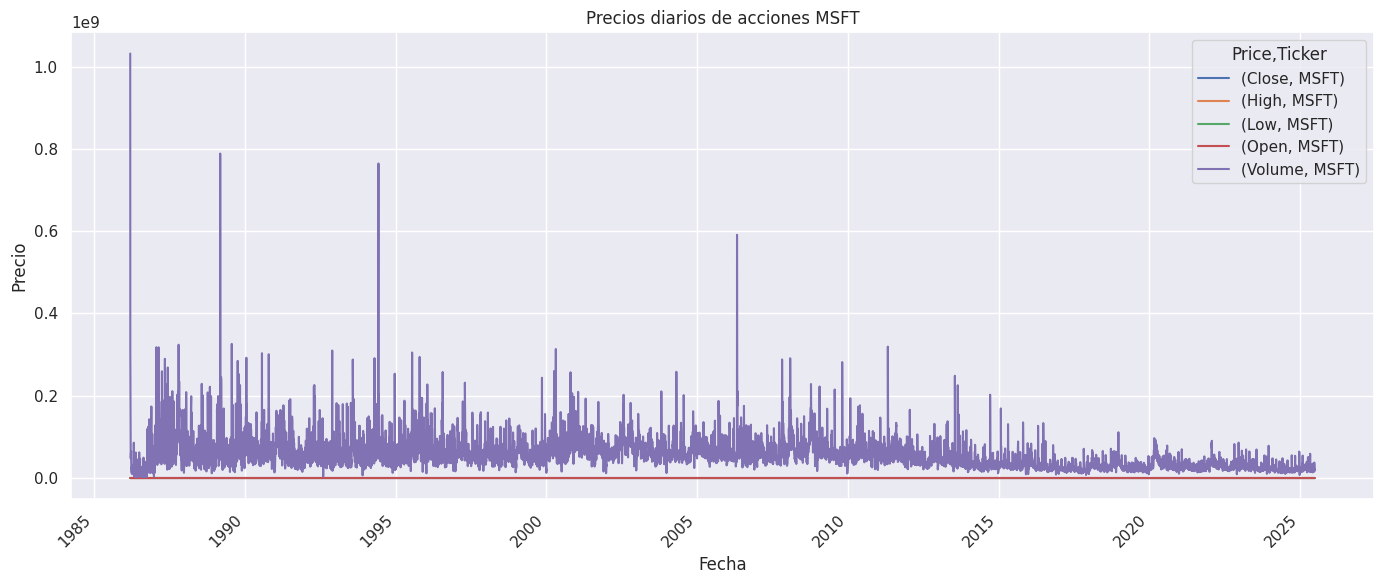

In [65]:
# Seleccionar columnas como tuplas
cols = [('Close', 'MSFT'), ('High', 'MSFT'), ('Low', 'MSFT'), ('Open', 'MSFT'),('Volume','MSFT')]
df_plot = df.loc[:, cols]

# Graficar usando Pandas directamente
df_plot.plot(figsize=(14,6), title='Precios diarios de acciones MSFT')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

¿PORQUÉ `loc` Y `plot()` ?


`sns.lineplot()` no puede graficar directamente un DataFrame con columnas tipo MultiIndex sin que esas columnas estén en formato plano o Series.

Aunque está correctamente columnas usando .loc[:, cols], el problema es que sns.`lineplot()` no acepta DataFrames multicolumna sin `x` e `y` definidos.

`.plot()` de Pandas, **sí** acepta MultiIndex sin problemas

* El volumen es mucho más grande que las otras variables de series de tiempo

*   Se elimina la varibable Volumen

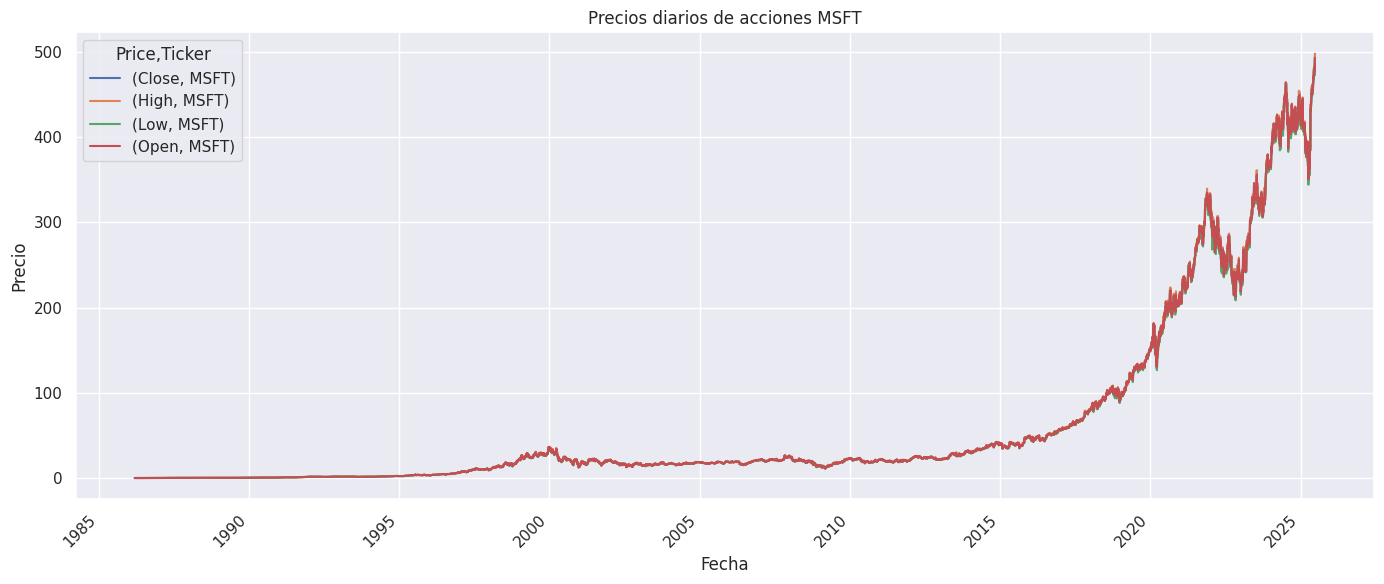

In [66]:
#ignorando el volume que tiene
cols = [('Close', 'MSFT'), ('High', 'MSFT'), ('Low', 'MSFT'), ('Open', 'MSFT'),]
df_plot = df.loc[:, cols]

# Graficar usando Pandas directamente
df_plot.plot(figsize=(14,6), title='Precios diarios de acciones MSFT')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Con esto se puede hacer un análisis con el serie de tiempo.
Desde el 2015  Microsfot empezó ha tenido un crecimiento valorable de su valor de acción comparado con los años anteriores a 2025

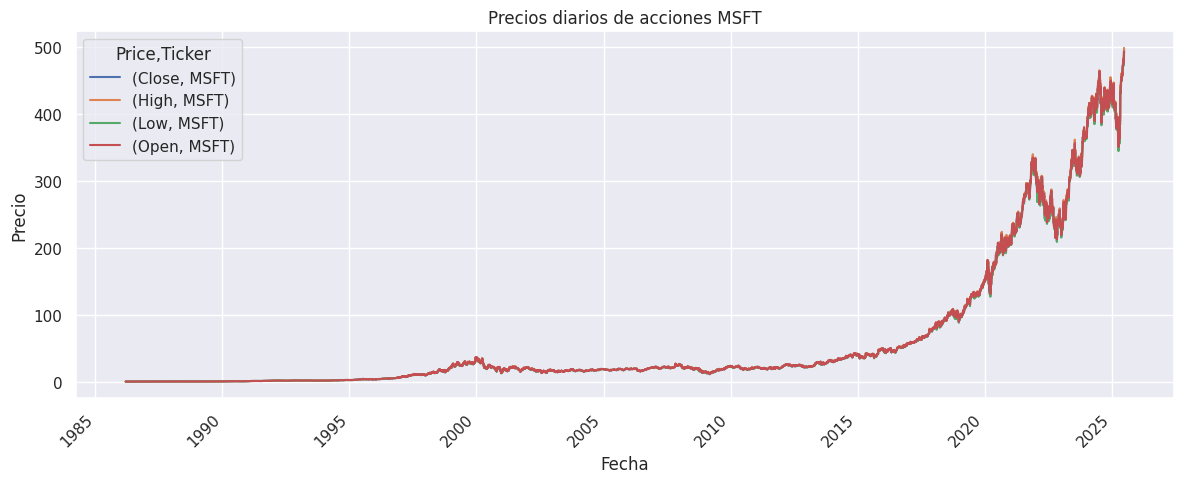

In [69]:
fig, ax = plt.subplots(figsize=(12, 5))

df_plot.plot(ax=ax)

ax.set_title('Precios diarios de acciones MSFT')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



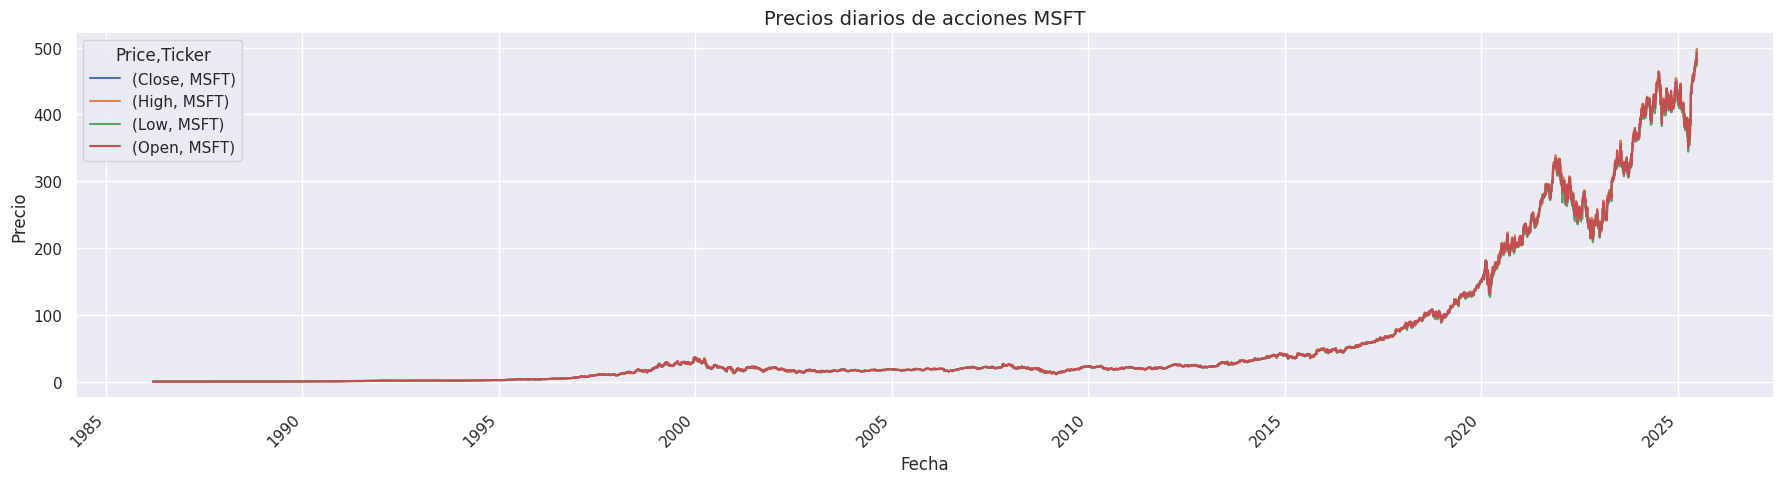

In [70]:
#Indicándole que quiero que lo haga sobre la anterior pero más ancha:
fig, ax = plt.subplots(figsize=(18, 5))  # Aumentamos el ancho de 12 → 18

# Dibujar gráfico de precios (suponiendo que df_plot ya contiene Close, High, Low, Open)
df_plot.plot(ax=ax)

# Personalización del gráfico
ax.set_title('Precios diarios de acciones MSFT', fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


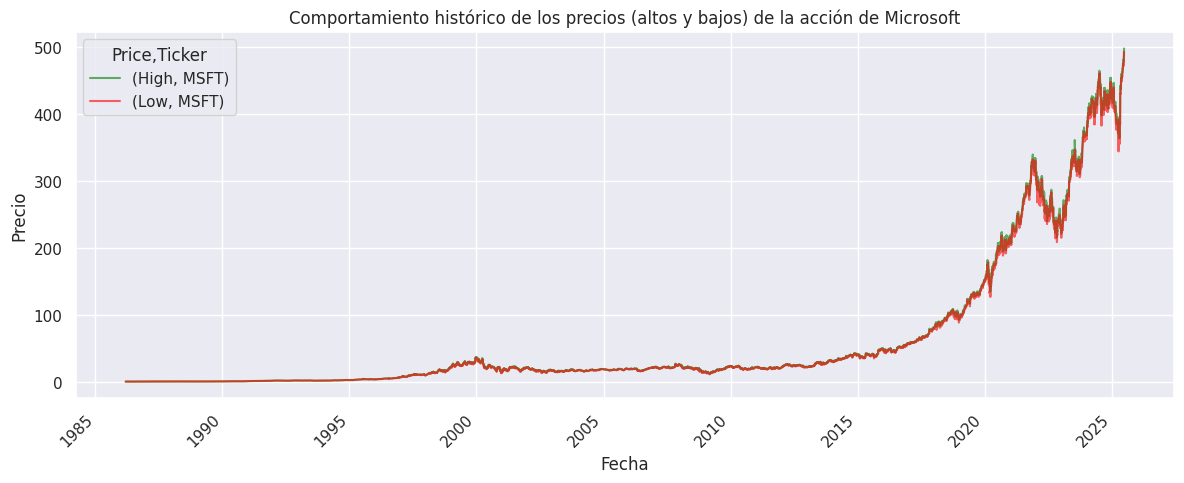

In [75]:
# Seleccionar solo High y Low
cols = [('High', 'MSFT'), ('Low', 'MSFT')]
df_plot = df.loc[:, cols]

# Crear figura
fig, ax = plt.subplots(figsize=(12, 5))

# Graficar con pandas, no Seaborn
df_plot.plot(ax=ax, alpha=0.6, color=['GREEN', 'red']) #con transparenncia en 0.6

# Etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
ax.set_title('Comportamiento histórico de los precios (altos y bajos) de la acción de Microsoft')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Moatrando las fechas como Año-Mes (por ejemplo, 2024-10), en lugar de dd-mm-yyyy u otro formato largo.

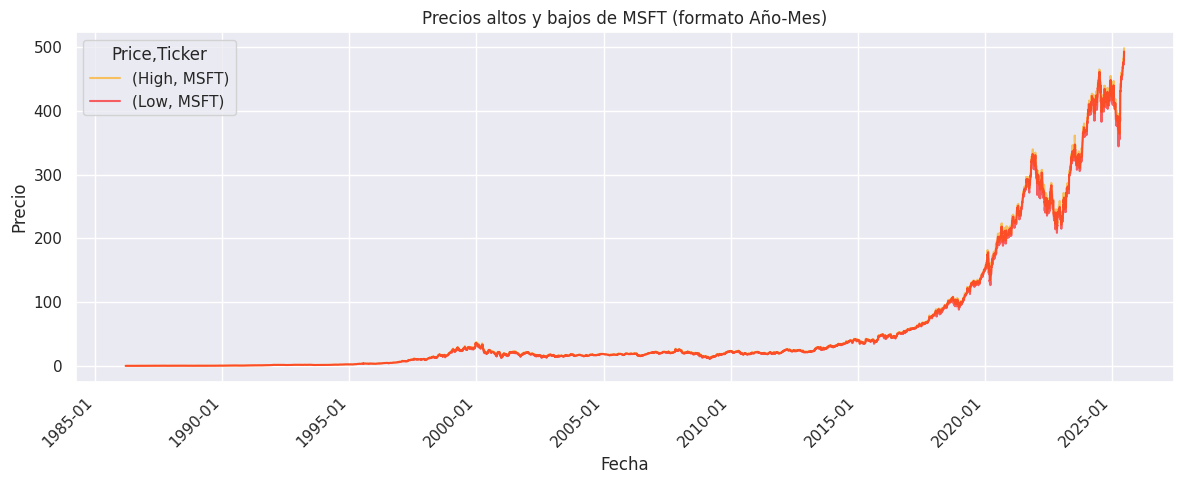

In [78]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # <- IMPORTANTE para usar DateFormatter

# Seleccionar columnas de interés con tuplas
cols = [('High', 'MSFT'), ('Low', 'MSFT')]
df_plot = df.loc[:, cols]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 5))

# Graficar usando pandas (funciona con MultiIndex)
df_plot.plot(ax=ax, alpha=0.6, color=['orange', 'red'])

# Formatear fechas en eje X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
ax.set_title('Precios altos y bajos de MSFT (formato Año-Mes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Marcas cada 18 meses y en "DateFormatter" usemos "%Y-%b" para mostrar el año numéricamente y el nombre del mes:

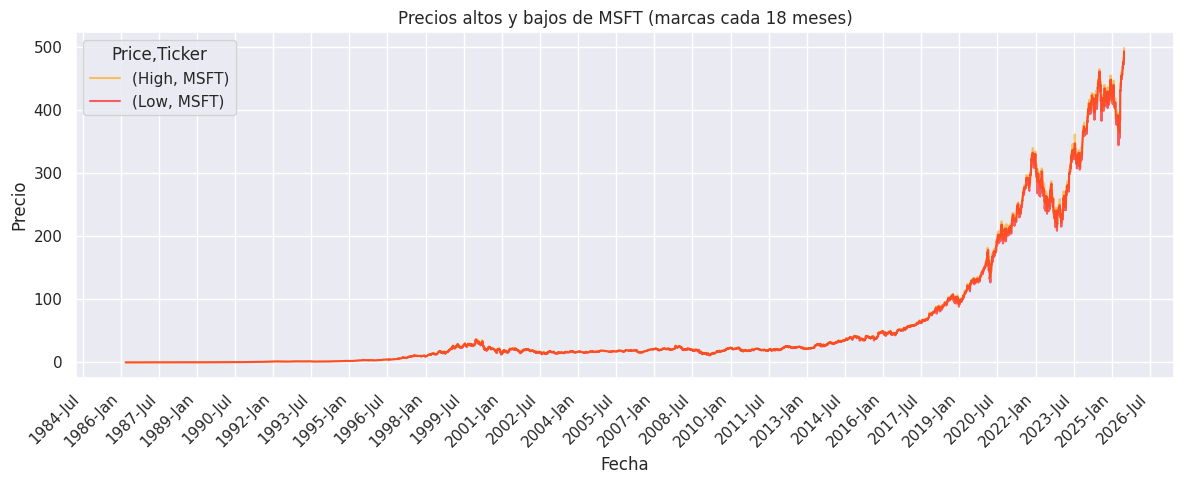

In [79]:

# Seleccionar columnas de interés con tuplas
cols = [('High', 'MSFT'), ('Low', 'MSFT')]
df_plot = df.loc[:, cols]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 5))

# Graficar usando pandas
df_plot.plot(ax=ax, alpha=0.6, color=['orange', 'red'])

# Mostrar marcas cada 18 meses
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=18))

# Formatear fechas: Año y mes abreviado (Ene, Feb, Mar...)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

# Personalizar etiquetas
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
ax.set_title('Precios altos y bajos de MSFT (marcas cada 18 meses)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Y como el índice está en formato "DateTime" podemos mostrar las marcas de tiempo incluso en horas y minutos.

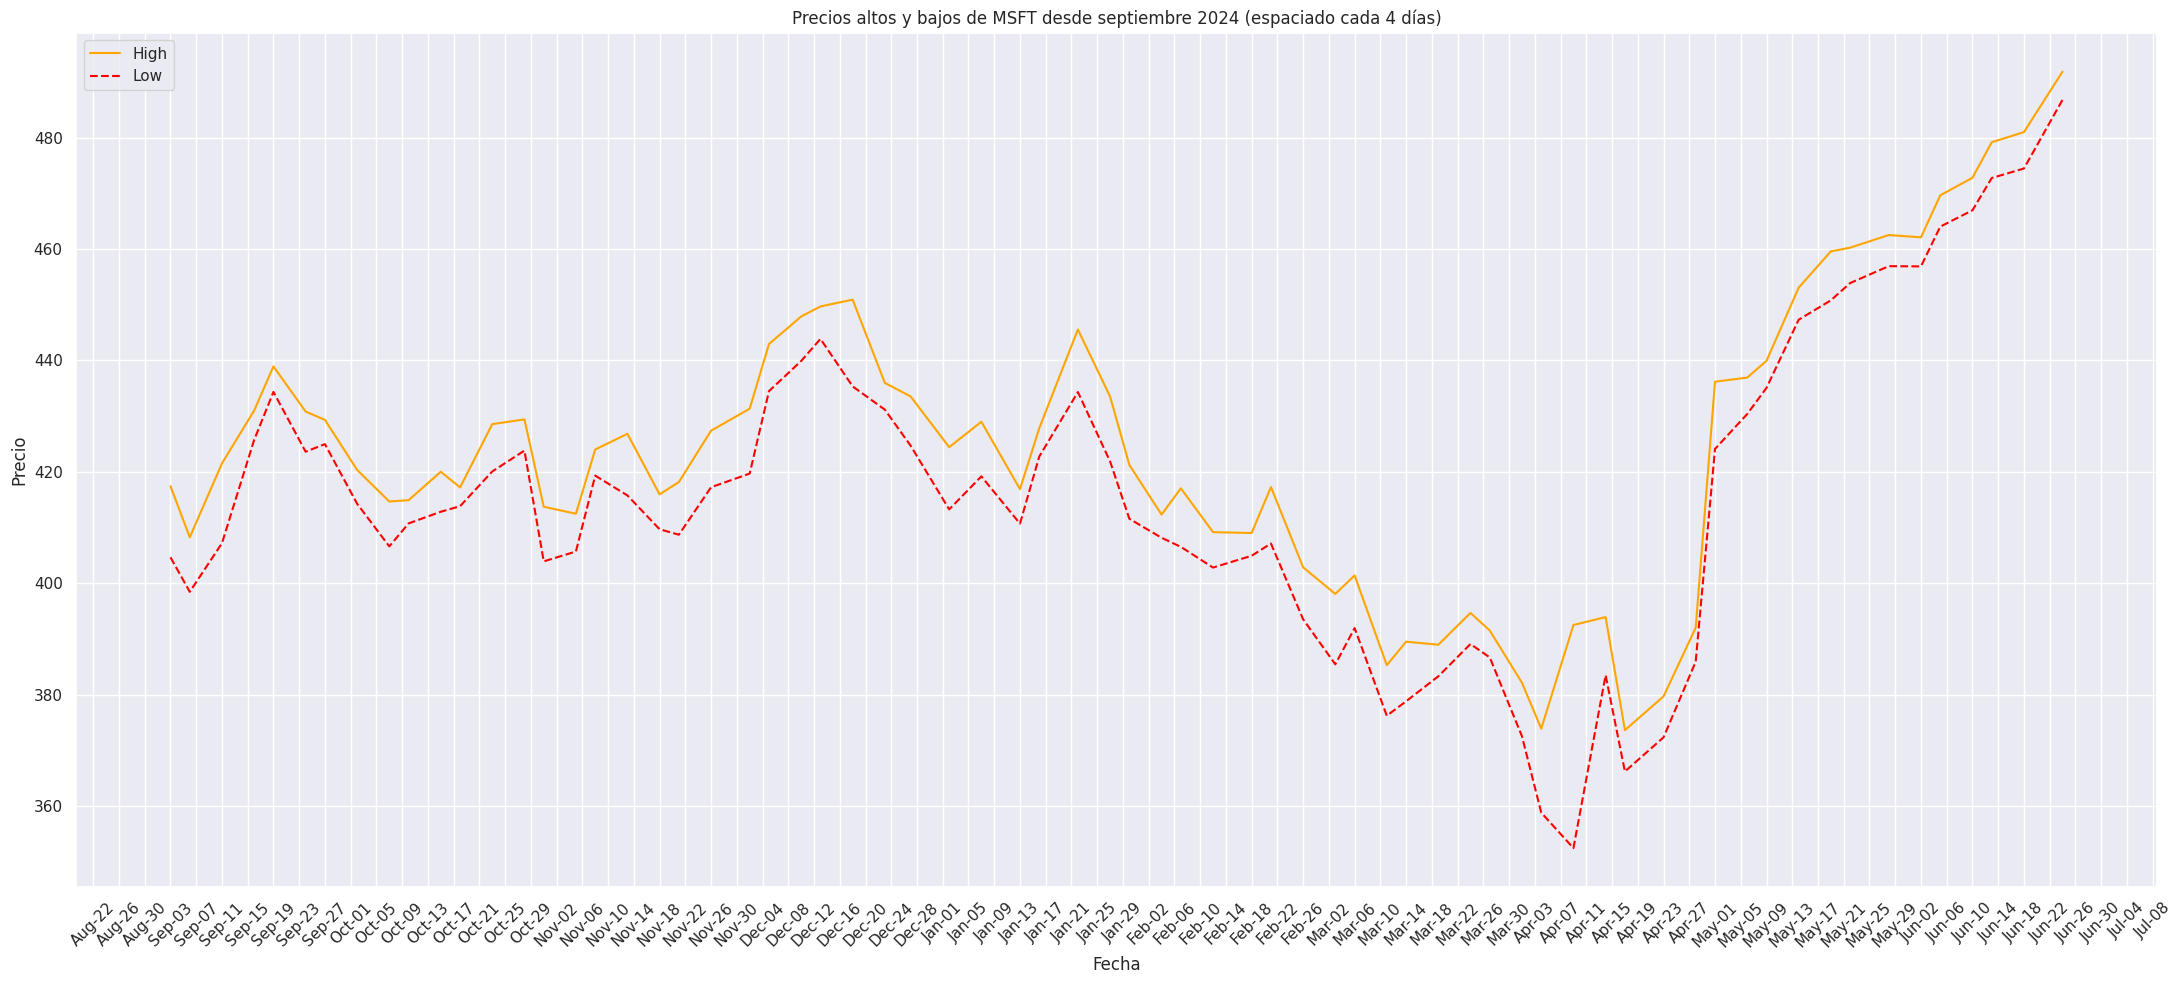

In [95]:
# Filtrar columnas desde septiembre 2024
df_simple = df.loc['2024-09-01':, [('High', 'MSFT'), ('Low', 'MSFT')]]

# Aplanar columnas
df_simple.columns = ['High', 'Low']
df_simple = df_simple.reset_index()  # 'Date' como columna

# Reducir datos para evitar saturación visual: cada 3er registro (ajustable)
df_simple = df_simple.iloc[::3, :]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(22,10))

# Graficar con seaborn
sns.lineplot(data=df_simple, x='Date', y='High', ax=ax, color='orange', label='High')
sns.lineplot(data=df_simple, x='Date', y='Low', ax=ax, color='red', label='Low', linestyle='--')

# Mostrar marcas cada 4 días
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))

# Formatear fechas: mes abreviado, día
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

# Etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
ax.set_title('Precios altos y bajos de MSFT desde septiembre 2024 (espaciado cada 4 días)')

# Rotar fechas y ajustar
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Visualizando el comportamiento, hay porciones que pueden importar, en mi caso remarco a finales de diciembre del 2024 que es el más alto

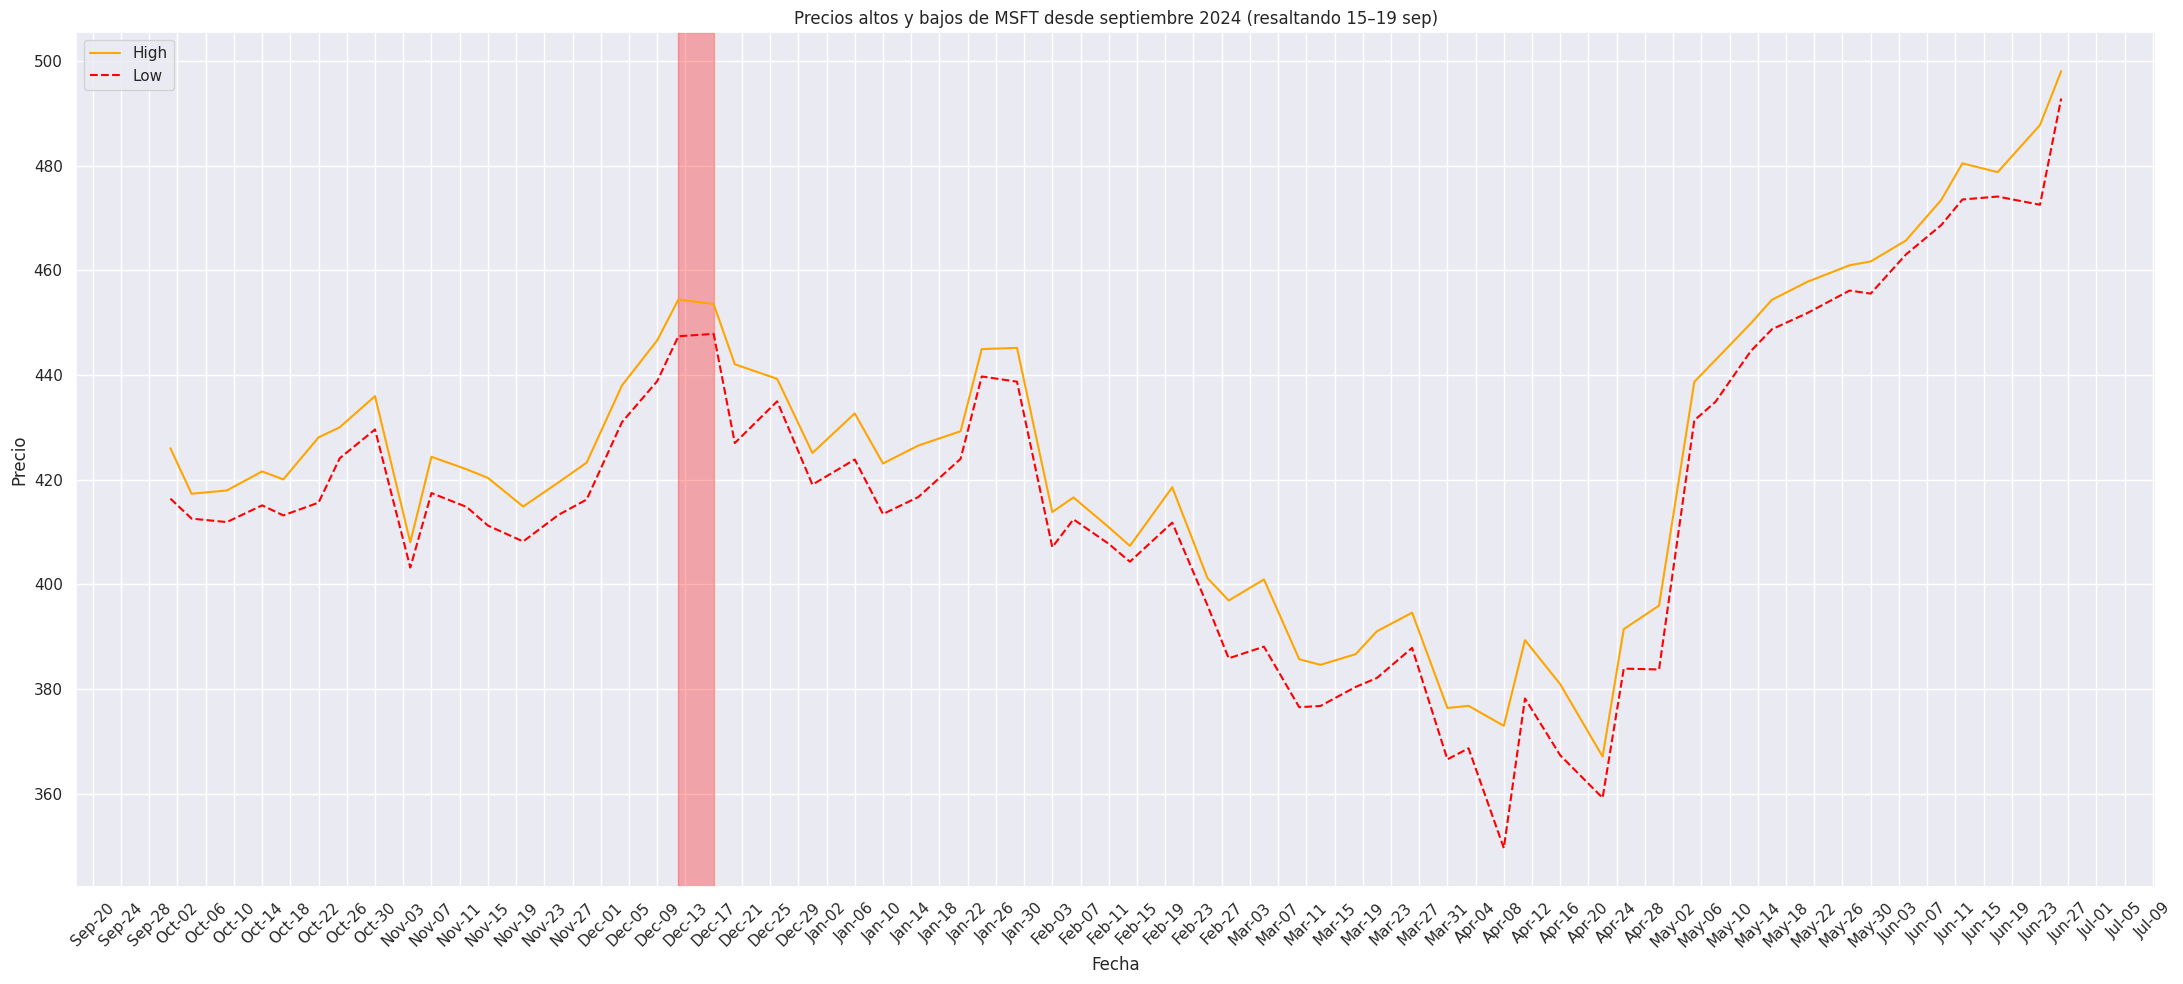

In [105]:
# Filtrar datos donde es más alto
df_simple = df.loc['2024-10-01':, [('High', 'MSFT'), ('Low', 'MSFT')]]

# Aplanar columnas
df_simple.columns = ['High', 'Low']
df_simple = df_simple.reset_index()  # asegurarnos de que 'Date' esté como columna

# Reducir frecuencia de puntos para evitar saturación visual
df_simple = df_simple.iloc[::3, :]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(22, 10))

# Graficar con seaborn
sns.lineplot(data=df_simple, x='Date', y='High', ax=ax, color='orange', label='High')
sns.lineplot(data=df_simple, x='Date', y='Low', ax=ax, color='red', label='Low', linestyle='--')

# Mostrar marcas cada 4 días
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))

# Formato de fechas
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

# Resaltar el rango del 15 al 19 de septiembre
t_inicio = pd.Timestamp('2024-12-12')
t_final = pd.Timestamp('2024-12-17')
ax.axvspan(t_inicio, t_final, color='red', alpha=0.3)

# Etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
ax.set_title('Precios altos y bajos de MSFT desde septiembre 2024 (resaltando 15–19 sep)')

# Rotar fechas y ajustar
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
